# Exploratory Data Analysis


# 2. EDA on Stores Data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

print('imported library')

imported library


In [2]:
# reading dataset

url = '..\favorita-grocery-sales-forecasting'

stores = pd.read_csv(os.path.join(url,"stores.csv"))

train = pd.read_csv(os.path.join(url, "train.csv") , nrows=1000000 , parse_dates = ['date'] , index_col = 'id')


In [3]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
# checking for missing values

stores.isnull().any()

store_nbr    False
city         False
state        False
type         False
cluster      False
dtype: bool

In [5]:
stores.isnull().values.any()  # False

False


No Column has Nan Values

# No of Stores per each State 
تعداد فروشگاهها در هر منطقه 

In [6]:

x = stores.state.value_counts().to_frame()
x

# stores[stores['state']=='Pichincha'].count()


,state
Pichincha,19
Guayas,11
Azuay,3
Santo Domingo de los Tsachilas,3
Manabi,3
Los Rios,2
Cotopaxi,2
El Oro,2
Tungurahua,2
Bolivar,1


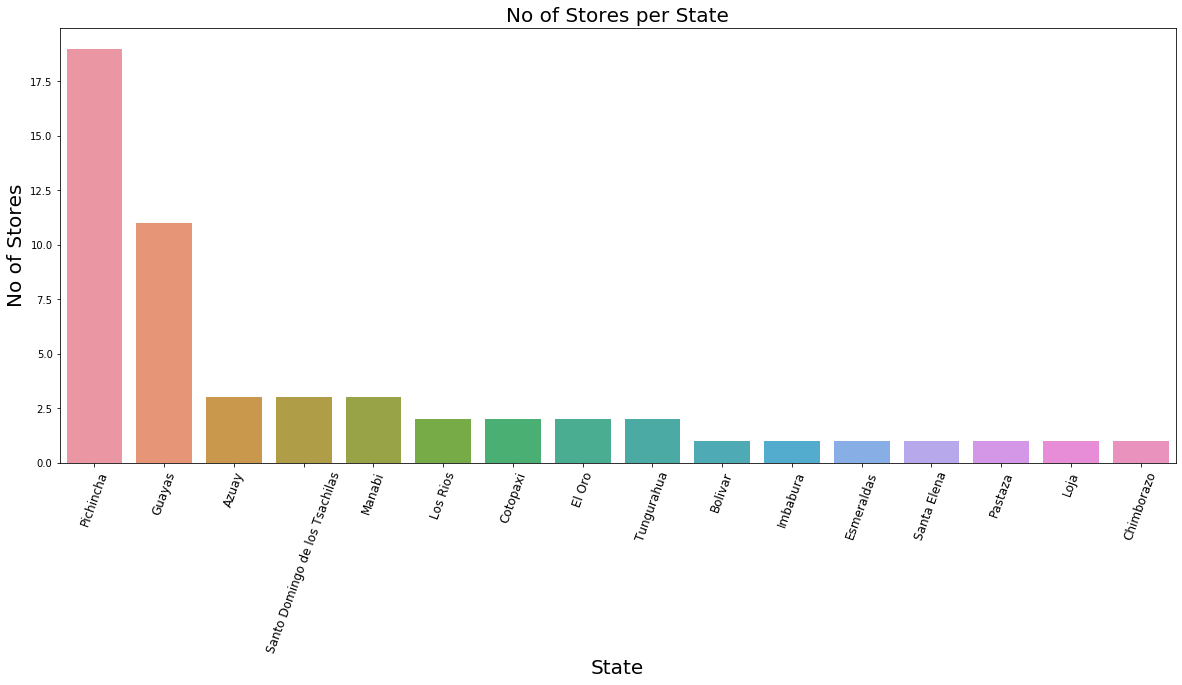

In [7]:
#Plotting state Vs no.of stores

plt.figure( figsize=(20,8) )

ax = sns.barplot(x = x.index , y = x.state , data=x)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 70 , fontsize = 12)

plt.title('No of Stores per State', fontsize=20)
plt.ylabel('No of Stores', fontsize=20)
plt.xlabel('State', fontsize=20)

plt.show()


- Pichincha has maximum no. of stores i.e 19 stores ,
- followed by Guayas with 11 stores ,
- Other States have no. of stores between 1 and 3

# Sales per State

In [8]:
# Merging store dataframe with sales dataframe

df_store_sales = train.merge(stores, how='inner', on='store_nbr')

df_store_sales.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1
1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1
2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1
3,2013-01-01,25,108079,1.0,NaN,Salinas,Santa Elena,D,1
4,2013-01-01,25,108701,1.0,NaN,Salinas,Santa Elena,D,1


In [9]:
# مجموع فروش هر منطقه
x = df_store_sales.groupby(['state'], as_index=False).agg({'unit_sales':'sum'}) 
x

,state,unit_sales
0,Azuay,355550.351
1,Bolivar,102841.090
2,Chimborazo,134370.349
3,Cotopaxi,208037.469
4,El Oro,202710.564
5,Esmeraldas,101030.599
6,Guayas,1204092.241
7,Imbabura,110635.732
8,Loja,174856.667
9,Los Rios,256999.687


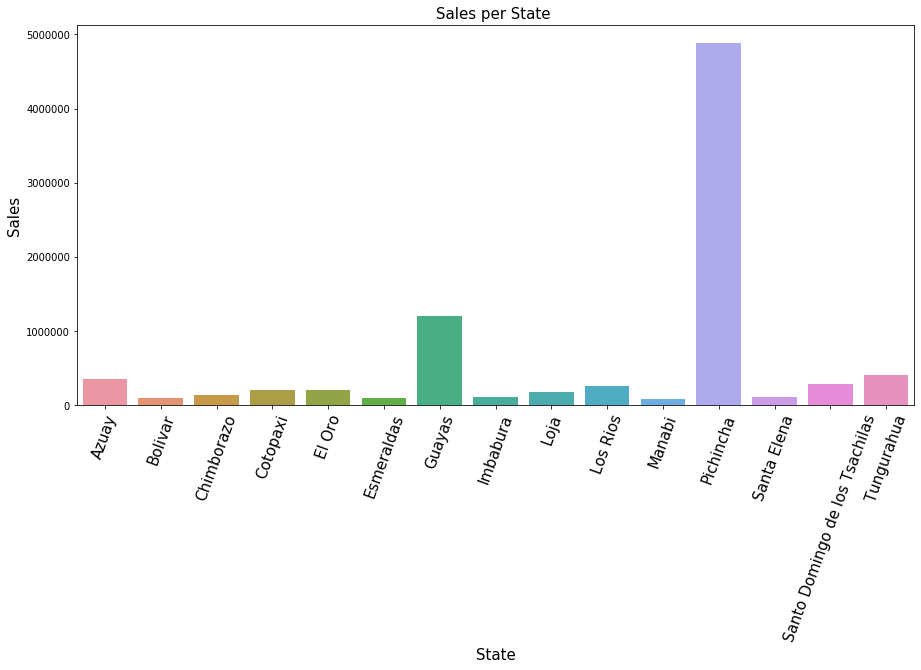

In [10]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = x.state, y=x.unit_sales, data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per State ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()


- Pichincha has maximum sales (as it has max no. of stores stores) followed by Guayas.
- Other States have much lower sales.

# No of Stores per each City

In [11]:

x = stores.city.value_counts().to_frame()
x

,city
Quito,18
Guayaquil,8
Cuenca,3
Santo Domingo,3
Ambato,2
Latacunga,2
Manta,2
Machala,2
Guaranda,1
Babahoyo,1


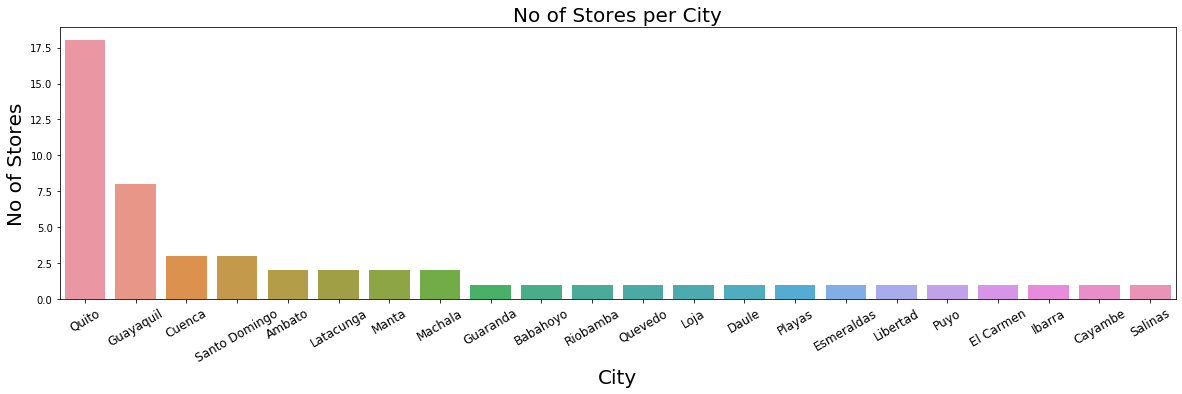

In [12]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = x.index, y= "city",data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 12)
plt.title('No of Stores per City',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)
plt.show()

# Sales per City :

In [13]:
x = df_store_sales.groupby(['city'], as_index=False).agg({'unit_sales':'sum'}) 
x

,city,unit_sales
0,Ambato,409208.392
1,Babahoyo,136490.517
2,Cayambe,268168.180
3,Cuenca,355550.351
4,Daule,136221.540
5,El Carmen,87369.157
6,Esmeraldas,101030.599
7,Guaranda,102841.090
8,Guayaquil,1008658.044
9,Ibarra,110635.732


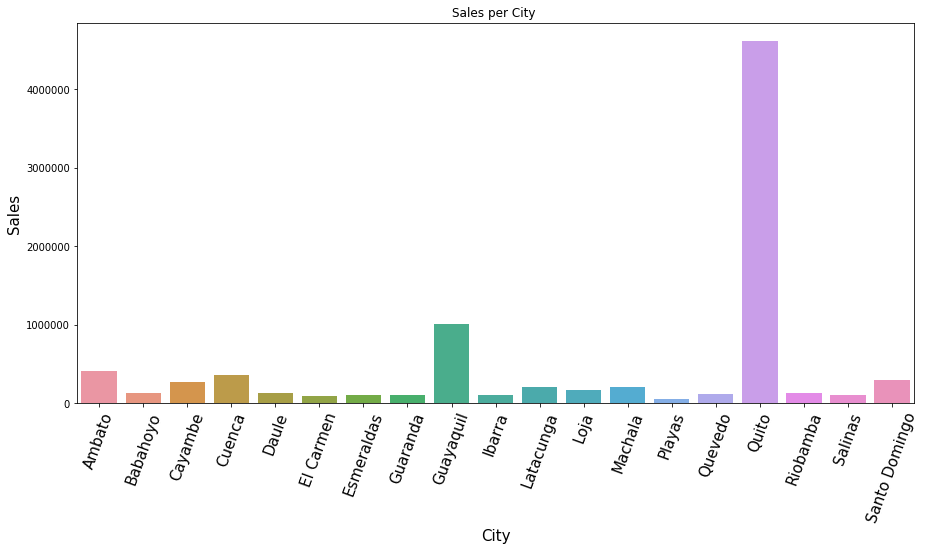

In [14]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = x.city, y= x.unit_sales , data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per City ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.show()

- Quito has maximum sales overall (as it has the maximum no. of stores)
- Cities shows a certain amount of variation in the average sale numbers.

# No of Stores per Store Type :

In [15]:
x = stores.type.value_counts().to_frame()
x

,type
D,18
C,15
A,9
B,8
E,4


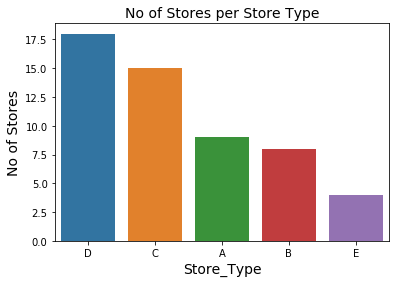

In [16]:
sns.barplot(x = x.index, y= x.type , data=x )
plt.title("No of Stores per Store Type",fontsize=14 )
plt.xlabel('Store_Type', fontsize=14 )
plt.ylabel('No of Stores',fontsize=14 )
plt.show()

- "D" and “C” are the most frequent, with “A” and “B” having similar medium frequency and “E” only accounting for 4 stores.
- Type D has maximum no. of stores followed by C.
- Type E has minimum no. of stores.

# Sales per Store Type :

In [17]:
x = df_store_sales.groupby(['type'], as_index=False).agg({'unit_sales':'sum'}) 
x

,type,unit_sales
0,A,2954199.386
1,B,1076140.776
2,C,1405072.095
3,D,2996216.924
4,E,205127.097


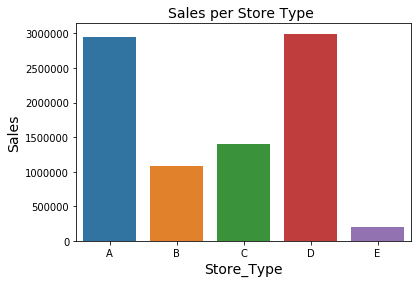

In [18]:
sns.barplot(x = x.type , y = x.unit_sales , data = x)
plt.title("Sales per Store Type ",fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Store_Type',fontsize=14)
plt.show()

- Types A and D have much higher sales .
- Type A has approx half no. of stores as compared to Type D 
      => means Type A stores could be bigger in size or in prime location

- Type E has minimum sales (it has minimum no. of stores )


# No of Stores per Cluster :

In [19]:
x = stores.cluster.value_counts(sort=True , ascending=False).to_frame()
x

,cluster
3,7
6,6
10,6
15,5
14,4
13,4
1,3
11,3
8,3
4,3


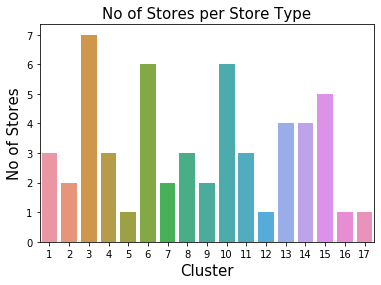

In [20]:
sns.barplot(x = x.index, y= x.cluster ,data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.title("No of Stores per Store Type",fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('No of Stores',fontsize=15)
plt.show()

- 54 unique stores and these are clustered into 17 unique groups
- Cluster no. 3 has maximum no. of stores followed by 6 and 10.

# Sales per Cluster :
    

In [21]:
x = df_store_sales.groupby(['cluster'], as_index=False).agg({'unit_sales':'sum'}) 
x

,cluster,unit_sales
0,1,493973.612
1,2,194549.214
2,3,607805.443
3,4,447706.871
4,5,560051.541
5,6,818952.247
6,7,134370.349
7,8,898083.293
8,9,309352.676
9,10,438016.468


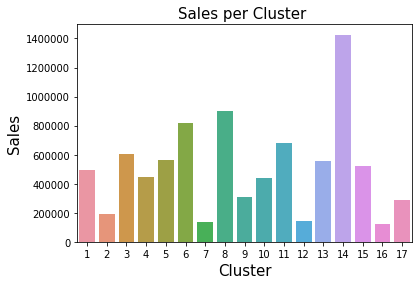

In [22]:
sns.barplot(x = x.cluster, y= "unit_sales", data = x)
plt.title("Sales per Cluster ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.show()

- Cluster 14 has maximum sales.
- Cluster 16 has minimum sales.
- The cluster feature shows a clear variation in sales numbers.

In [23]:
# stores.cluster.unique()
# stores.cluster.value_counts()
